## PRACTICAL :: Mining Customer Satisfaction

1. Connect to Twitter API and extract tweets around a particular product ( your favourite product :-) )
2. Perform sentiment analysis and identify what customers like and dislike about the product
3. Visualise and report findings

## Connect to Twitter API and extract tweets around your favourite product

Choose your favourite product and identify if there are hashtags for that. If not find its Twitter account page and use its username to retrieve tweets that mention it. Alternatively you can use the product name as a keyword to retrieve tweets that contain the specified keyword.

Define functions to connect to Twitter API and retrieve tweets around a specific search term.

In [34]:
# import required libraries
import tweepy           # To access and consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# Twitter App access keys

# Consume:
CONSUMER_KEY    = 'x8kiAaw5kegIYqNlsKFGFNRia'
CONSUMER_SECRET = 'XVyJTaQMT0uNsMAyyPzZAsgxP2ykEU6czWxRWggwceF2D1cQMZ'

# Access:
ACCESS_TOKEN  = '890735734100905985-PljAE2qePUozbwqkTyNkSRfxIy1MLKk'
ACCESS_SECRET = 'Ji10kzq3AlzCcP8B8Mv0ZUXgGyKwzQnF17S64oHslfnov'


#-------------------- Function to connect to API and return an API object------------------------------------\\
def connectToTwitterAPI():
    """
    Utility function to setup the Twitter's API
    with access keys.
    """
    # Authentication and access using keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication
    api = tweepy.API(auth)
    return api


#------------------- Function to search and retrieve dataframe of tweets-----------------------------------\\
def searchAndReturnTweetTable(searchTerm, numberOfTweets):
    # Create an extractor object
    extractor = connectToTwitterAPI()

    # Specify search criteria and extract tweets into a list
    tweets = extractor.search(q=searchTerm, lang = 'en', count=numberOfTweets)
    
    # Create a pandas dataframe
    tweetTable = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

    # Add relavant data from each tweet
    tweetTable['len']  = np.array([len(tweet.text) for tweet in tweets]) #textual content legnth
    tweetTable['ID']   = np.array([tweet.id for tweet in tweets])
    tweetTable['Date'] = np.array([tweet.created_at for tweet in tweets])
    tweetTable['Source'] = np.array([tweet.source for tweet in tweets])
    tweetTable['Likes']  = np.array([tweet.favorite_count for tweet in tweets]) #likes counts
    tweetTable['RTs']    = np.array([tweet.retweet_count for tweet in tweets]) #retweets count
    
    #print(len(tweetTable['Tweets'])) #print the total number of tweets retrieved
    tweetTable = tweetTable[~tweetTable.Tweets.str.startswith('RT')]
    #print(len(tweetTable['Tweets'])) #print the total number of tweets after removing retweets
    
    # Reset index in the data frame after removing retweet rows 
    tweetTable.reset_index(drop=True, inplace=True)
    
    return tweetTable

### Customer Analysis on McDonald's

Call the function and retrieve tweets about McDonald's. Now display it in a table to observe its content.

In [107]:
dfTweets = searchAndReturnTweetTable("@McDonalds", 500)
display(dfTweets)

,Tweets,len,ID,Date,Source,Likes,RTs
0,Ronald is tucked on a shelf at Fire Station 4 ...,140,985136959952769024,2018-04-14 12:45:28,Twitter for iPhone,0,1
1,I just went to a McDonalds. I deliberately ask...,139,985136781053095936,2018-04-14 12:44:46,Twitter for Android,0,0
2,@antmagic219 Why allow air this garbage on you...,140,985136285105999873,2018-04-14 12:42:47,Twitter for iPhone,0,0
3,I just tried the @McDonalds order kiosk. I’m s...,140,985136279171092482,2018-04-14 12:42:46,Tweetbot for iΟS,0,0
4,@ChickfilA about to overtake @McDonalds as top...,133,985136230248648704,2018-04-14 12:42:34,Twitter for Android,0,0
5,@McDonalds I’m going to Wendy’s,31,985136004280606720,2018-04-14 12:41:41,Twitter Lite,0,0
6,@McDonalds WHAT HAPPENED TO MY BREAKFAST SAUSA...,140,985135638625308672,2018-04-14 12:40:13,Twitter for Android,0,0
7,"@McDonalds \nWhen you order a sausage, egg, &a...",111,985135482479763457,2018-04-14 12:39:36,Twitter for Android,0,0
8,"To everyone who's got exams coming up, remembe...",129,985135435558113282,2018-04-14 12:39:25,Twitter for iPhone,0,0
9,Took 1 sip of @McDonalds sweet tea and my whol...,116,985135396764909568,2018-04-14 12:39:16,Twitter for iPhone,0,0


Write tweets into a CSV file for further analysis. Read and obtain a general sentiment about the product. 

In [119]:
import csv

# Write tweets data frame into a CSV file for later use
#dfTweets.to_csv("tweets.csv", encoding='utf-8', index=False)

# Read tweets from CSV file into a data frame
data = pd.read_csv("McDonaldstweets.csv")
display(data)

,Tweets,len,ID,Date,Source,Likes,RTs
0,Ronald is tucked on a shelf at Fire Station 4 ...,140,985136959952769024,2018-04-14 12:45:28,Twitter for iPhone,0,1
1,I just went to a McDonalds. I deliberately ask...,139,985136781053095936,2018-04-14 12:44:46,Twitter for Android,0,0
2,@antmagic219 Why allow air this garbage on you...,140,985136285105999873,2018-04-14 12:42:47,Twitter for iPhone,0,0
3,I just tried the @McDonalds order kiosk. I’m s...,140,985136279171092482,2018-04-14 12:42:46,Tweetbot for iΟS,0,0
4,@ChickfilA about to overtake @McDonalds as top...,133,985136230248648704,2018-04-14 12:42:34,Twitter for Android,0,0
5,@McDonalds I’m going to Wendy’s,31,985136004280606720,2018-04-14 12:41:41,Twitter Lite,0,0
6,@McDonalds WHAT HAPPENED TO MY BREAKFAST SAUSA...,140,985135638625308672,2018-04-14 12:40:13,Twitter for Android,0,0
7,"@McDonalds \nWhen you order a sausage, egg, &a...",111,985135482479763457,2018-04-14 12:39:36,Twitter for Android,0,0
8,"To everyone who's got exams coming up, remembe...",129,985135435558113282,2018-04-14 12:39:25,Twitter for iPhone,0,0
9,Took 1 sip of @McDonalds sweet tea and my whol...,116,985135396764909568,2018-04-14 12:39:16,Twitter for iPhone,0,0


Extract the most liked tweet and the most retweeted tweet. Define functions to print the most liked tweet and the most retweeted tweet.

In [109]:
#------------- Function to print the most liked tweet---------------------------------------------\\
def PrintMostLikedTweet(tweetTable):
    maxLikes = np.max(tweetTable['Likes'])
    fav = tweetTable[tweetTable.Likes == maxLikes].index[0]
    
    # Print FAVs
    print("The tweet with more likes is: \n{}".format(tweetTable['Tweets'][fav]))
    print("Number of likes: {}".format(maxLikes))
    
#------------- Function to print the most retweeted tweet-----------------------------------------\\
def PrintMostRetweetedTweet(tweetTable):
    maxRetweets  = np.max(tweetTable['RTs'])
    rt  = tweetTable[tweetTable.RTs == maxRetweets].index[0]
    
    # Print RTs
    print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
    print("Number of retweets: {}".format(maxRetweets))
    

Print the most liked and retweeted tweets.

In [110]:
PrintMostLikedTweet(data)

print() # Add a newline
PrintMostRetweetedTweet(data)


The tweet with more likes is: 
I'm having brunch at @McDonalds
Number of likes: 3

The tweet with more retweets is: 
Ronald is tucked on a shelf at Fire Station 4 in Akron, which will soon be a @McDonalds as part of a safety/economi… https://t.co/x1Rnz8ubky
Number of retweets: 1


In [1]:
from IPython.core.display import HTML
display(HTML('<div style="border-style:solid; border-width: 1px; border-color: gray; padding: 10px 10px 10px;"> <b><u>Findings</u></b></br> Please note that this is a demo. In order to arrive at sound conclusions, you need a larger data set. </br> </br> The most liked tweet implies that people tend to go for brunch at McDonalds. It is interesting to analyse sales at each time during the day, in order to boost company\'s profits. The most retweeted tweet implies that the company is investing on expansions. Further analysis on the article referred by the URL shows that location is a good fit as the new McDonalds will be set up in Ohio CitiCenter. </div>'))

## Perform Sentiment Analysis

Define functions to clean tweets and calculate sentiments.

In [145]:
from textblob import TextBlob #library to classify polarity of a tweet
import re

#------------- Function to clean a tweet ---------------------------------------------\\
def cleanTweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


#------------- Function to classify polarity ---------------------------------------------\\
def classifyPolarity(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(cleanTweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    

#------------- Function to compute sentiment ---------------------------------------------\\
def computeSentiment(tweetDT):
    # Compute sentiment for each tweet and add the result into a new column
    tweetDT['SA'] = np.array([classifyPolarity(tweet) for tweet in tweetDT['Tweets'] ])

    # Display the first 10 elements of the dataframe
    #display(tweetDT.head(10))


#------------- Function to visualize sentiment in a pie chart---------------------------------------------\\
def displaySentimentPieChart(tweetDT):
    # Compute sentiment
    computeSentiment(tweetDT)
    
    # For plotting and visualization
    from IPython.display import display
    import matplotlib.pyplot as plt
    
    # Calculate number of positive, negative and neutral tweets
    positiveTweetCount = len(tweetDT[tweetDT.SA > 0])
    neutralTweetCount = len(tweetDT[tweetDT.SA == 0])
    negativeTweetCount = len(tweetDT[tweetDT.SA < 0])
    
    # Print number of positive, negative and neutral tweets
    print ("Number of positive tweets: {}".format(positiveTweetCount))
    print ("Number of negative tweets: {}".format(negativeTweetCount))
    print ("Number of neutral tweets: {}".format(neutralTweetCount))

    # Calculate percentages
    totalTweetCount = len(tweetDT['Tweets'])
    positivePercent = (positiveTweetCount)*100/totalTweetCount
    neutralPercent = (neutralTweetCount)*100/totalTweetCount
    negativePercent = (negativeTweetCount)*100/totalTweetCount
    
    labels = ['Positive', 'Neutral', 'Negative']
    sizes = [positivePercent, neutralPercent, negativePercent]

    # Set different colors
    colors = ['green', 'grey', 'red']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()

Compute sentiment and observe sentiments.

Number of positive tweets: 21
Number of negative tweets: 14
Number of neutral tweets: 29


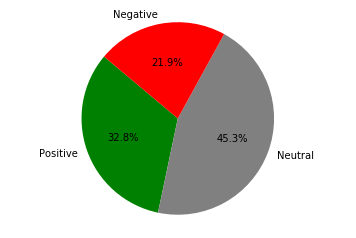

In [112]:
displaySentimentPieChart(data)

In [3]:
display(HTML('<div style="border-style:solid; border-width: 1px; border-color: gray; padding: 10px 10px 10px;"> <b><u>Findings </u></b> </br> Comparatively there is no big gap between positive sentiments and negative sentiments, although nearly half of the comments are neutral. However, when looking at the negative percentage, it is not a good sign for company\'s performance as 1/5th of comments are negative. Further analysis on negative tweets are required in order to identify key issues why customers are unhappy. </div>'))

## Further Analysis on Negative Sentiments

Now,let's extract negative tweets to identify if any issues and reasons why people have negative emotions around the product. 

Define a function to extract negative tweets and call the function to retrieve only negative tweets.

In [113]:
#------------- Function to filter negative tweets ---------------------------------------------\\
def getNegativeTweets(tweetTable):
    negativeTweetTable = tweetTable[tweetTable['SA'] == -1]
    return negativeTweetTable

# Call the function to extract and display negative tweets table
negativeTweets = getNegativeTweets(data)
#display(negativeTweets)

Print negative tweets and identify specific issues from the tweet content.

In [114]:
# Print each negative tweet
for tweet in negativeTweets['Tweets'].iteritems():
    print (tweet)

(3, 'I just tried the @McDonalds order kiosk. I’m surprised how much worse it is than the Wawa or Sheetz versions. Getti… https://t.co/FdLCcJUqaL')
(13, '@McDonalds there are only a few parts to a sausage, egg and cheese biscuit... I know it’s tough but how do you leav… https://t.co/XmEeGwWypY')
(15, '@McDonalds did you guys change the cheese on the Egg White Delight or something because they taste horrible now!?')
(17, 'I hate @McDonalds, the only thing I really get from there is the smoothies and their machines are always "broke" 🖕🏽')
(20, '@itshubert11 @McDonalds Don’t let that shit go to waste bro')
(24, '@riseishin @vh_vikram @globaltimesnews @McDonalds Ask yourself dude, how do you know that suggestion is "bad for Ch… https://t.co/4PJfugB1l1')
(27, '@McDonalds Nobody wants that nasty ass 💩')
(30, "@TyFox10 We're sorry we missed you! We now live at @McDonalds. We hope you'll follow us at that handle, and we look… https://t.co/UgIgkseayh")
(34, 'I’m not really sure what any of us e

Now let's visualize frequently used words in negative tweets. Word clouds are useful in visualizing prominent words within a data set. Let's create a word cloud for the negative tweets. In order to do so, first install the python library 'wordcloud'. This library has inbuilt easy to use functions to  create word clouds.

In [115]:
# Install wordcloud library
!pip install wordcloud


(-0.5, 399.5, 199.5, -0.5)

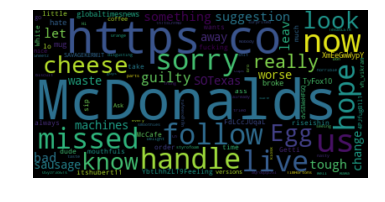

In [116]:
from wordcloud import WordCloud

#display(cleanedNegativeTweets[0])
# Generate a word cloud image
wordcloud = WordCloud().generate(''.join(negativeTweets['Tweets']))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [4]:
display(HTML('<div style="border-style:solid; border-width: 1px; border-color: gray; padding: 10px 10px 10px;"> <b><u>Findings </u></b> </br> Further analysis of negative tweets reveal lots of issues in terms of McDonald’s services and food quality. Customers are not happy with the computerized kiosks. It seems that kiosks are not functioning properly. Some customers complain about the food, which is not being consistent throughout. Further analysis of all the tweets reveal that menus are not up-to-date, not providing sufficient amount of sauces, not getting the orders right and inefficiencies in serving. </br></br> The word cloud presents words such as worse, sorry, bad, waste, missed etc. In order to get a useful and clear picture of the word usage, it is very important to have a large set of tweets.</div>'))

## Further Analysis on Positive Sentiments

Now extract postive tweets and identify if any specific reasons why people like your chosen product!
***

## Reporting: Recommendations for McDonald's

McDonald's, an American fast food company is one of the largest chain of fast food restaurants in the world. It has more than 35,000 franchises worldwide. It has been surviving for 78 years serving customers. Company is expanding further by investing in different countries as well as in America, for example opening up a new outlet in Ohio CityCenter. Such expansions in dense areas which consist of utilities service departments are profitable for the company as it may increase the number of customers for breakfast and brunches as well as during other times of the day. While company is exploring to expand, it is required to address existing issues around customer dissatisfaction in order to sustain in the fast food business. 

The following issues are identified through sentiment analysis on Tweets around McDonalds. 
*	Improper functioning of kiosks
*	Inconsistencies in taste, ingredients and sizes of food
*	Inefficiencies in serving customers at the outlets
*	Inaccuracies in the menus

In order to resolve these issues, following remedies are recommended.
*	Proper inspection and maintenance plan for kiosks and other machines at all outlets
*	Proper training to staff at all outlets
*	Real-time updates to the menus if items are unavailable at specific outlet

Further analysis on positive sentiments may introduce strengths of the company, which can be utilized in future.